# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi import NewsApiClient
import datetime as dt

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tomweekes/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

print(api_key)

d7652ec0f6ad4721a982d6888dbbf68d


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="Bitcoin", language="en")

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="Ethereum", language="en")

In [6]:
# Helper function to create the dataframe 
def create_sentiment_df(news):
    articles = []
    for article in news["articles"]:
        try:
            # Define parts of the articles that we want in the df
            title = article["title"]
            description = article["description"]
            date = article["publishedAt"][:10]
            content = article["content"]
            
            # Create the sentiment and define the properties
            sentiment = analyzer.polarity_scores(content)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            
            # Append each articles properties and scores in dictionary format to a list
            articles.append({
                "title": title,
                "description": description,
                "date": date,
                "content": content,
                "compound": compound,
                "pos": pos,
                "neu": neu,
                "neg": neg
            })
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)

In [7]:
btc_df = create_sentiment_df(btc_articles)
btc_df.head()

,title,description,date,content,compound,pos,neu,neg
0,A Field Guide for Nature-Resistant Nerds,"Yes, yes, the dirt is horrifying. But it’s als...",2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.939,0.061
1,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.822,0.000
2,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.873,0.000
3,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.000
4,Michael Arrington’s next act,"As longtime TechCrunch readers know well, Mich...",2021-07-21,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.903,0.000


In [8]:
eth_df = create_sentiment_df(eth_articles)
eth_df.head()

,title,description,date,content,compound,pos,neu,neg
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.925,0.000
1,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.939,0.061
2,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.000
3,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.810,0.000
4,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,1.000,0.000


In [9]:
# Get BTC min, max, mean
btc_df.describe()

,compound,pos,neu,neg
count,20.000000,20.000000,20.00000,20.000000
mean,0.048400,0.059400,0.89415,0.046450
std,0.463778,0.059611,0.09326,0.083549
min,-0.827100,0.000000,0.65300,0.000000
25%,-0.307000,0.000000,0.85325,0.000000
50%,0.000000,0.056000,0.91050,0.000000
75%,0.445000,0.092500,0.95425,0.076250
max,0.726400,0.178000,1.00000,0.287000


In [10]:
# Get ETH min, max, mean
eth_df.describe()

,compound,pos,neu,neg
count,20.000000,20.000000,20.00000,20.00000
mean,0.174515,0.056050,0.93050,0.01345
std,0.312339,0.073898,0.08117,0.02766
min,-0.340000,0.000000,0.78200,0.00000
25%,0.000000,0.000000,0.84275,0.00000
50%,0.000000,0.000000,0.96950,0.00000
75%,0.402575,0.129500,1.00000,0.00000
max,0.726400,0.190000,1.00000,0.07200


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had a very slightly higher mean positive score than Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin and Ethereum tied for the highest compound score at 0.7264, but this is because the same article is in both dataframes. It mentions Bitcoin and Ethereum.

Q. Which coin had the highest positive score?

A: Ethereum has the higher positive score at 0.19

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words("english"))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    clean = regex.sub("", text)
    
    # Create a tokenized list of the words
    words = word_tokenize(clean)
    
    # Lemmatize words into root words
    lemmatized = [lemmatizer.lemmatize(word) for word in words] 
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lemmatized if word.lower() not in sw]
    
    return tokens

In [14]:
# Create nested list of tokenized words from each article
# BTC
btc_tokenized = []

for i in btc_articles["articles"]:
    article = i["content"]
    btc_tokenized.append(tokenizer(article))

In [15]:
# Create nested list of tokenized words from each article
# ETH
eth_tokenized = []

for i in eth_articles["articles"]:
    article = i["content"]
    eth_tokenized.append(tokenizer(article))

In [16]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_tokenized

In [17]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_tokenized

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc_df.content.str.cat()), N)
Counter(grams).most_common(20)

[(('illustration', 'taken'), 5),
 (('july', 'reuters'), 3),
 (('reuters', 'bitcoin'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'front'), 3),
 (('bitcoin', 'ethereum'), 2),
 (('representation', 'virtual'), 2),
 (('front', 'stock'), 2),
 (('stock', 'graph'), 2),
 (('graph', 'illustration'), 2),
 (('taken', 'november'), 2),
 (('november', 'reutersdado'), 2),
 (('reutersdado', 'ruvicillustrationsingapore'), 2),
 (('charsby', 'reuters'), 2),
 (('wife', 'started'), 1),
 (('started', 'little'), 1),
 (('little', 'garden'), 1),
 (('garden', 'urban'), 1)]

In [20]:
# Generate the Ethereum N-grams where N=2
grams = ngrams(tokenizer(eth_df.content.str.cat()), N)
Counter(grams).most_common(20)

[(('bitcoin', 'ethereum'), 4),
 (('pc', 'motherboard'), 4),
 (('illustration', 'taken'), 4),
 (('cryptocurrencies', 'bitcoin'), 3),
 (('placed', 'pc'), 3),
 (('motherboard', 'illustration'), 3),
 (('taken', 'june'), 3),
 (('june', 'reutersdado'), 3),
 (('virtual', 'currency'), 2),
 (('february', 'reutersdado'), 2),
 (('reutersdado', 'ruvicillustrationnew'), 2),
 (('ruvicillustrationnew', 'york'), 2),
 (('aug', 'reuters'), 2),
 (('charsrepresentations', 'cryptocurrencies'), 2),
 (('ethereum', 'placed'), 2),
 (('reuters', 'ethereum'), 2),
 (('charsall', 'session'), 2),
 (('session', 'transform'), 2),
 (('transform', 'available'), 2),
 (('available', 'ondemand'), 2)]

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    flat_list = []
    for sublist in tokens:
        for item in sublist:
            flat_list.append(item)
    return Counter(flat_list).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
print("The top 10 words used in the Bitcoin articles are: ")
btc_top_10 = token_count(btc_tokenized)
btc_top_10

The top 10 words used in the Bitcoin articles are: 


[('char', 19),
 ('bitcoin', 10),
 ('reuters', 6),
 ('reutersdado', 6),
 ('july', 5),
 ('illustration', 5),
 ('taken', 5),
 ('attack', 5),
 ('seen', 4),
 ('get', 3)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
print("The top 10 words used in the Ethereum articles are: ")
eth_top_10 = token_count(eth_tokenized)
eth_top_10

The top 10 words used in the Ethereum articles are: 


[('char', 20),
 ('ethereum', 15),
 ('cryptocurrencies', 5),
 ('bitcoin', 5),
 ('illustration', 5),
 ('reutersdado', 5),
 ('reuters', 5),
 ('blockchain', 4),
 ('platform', 4),
 ('like', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15, 10]

In [25]:
# Word cloud generator function
def generate_cloud(words):
    # Turn nested list into flat list
    flat_list = []
    for sublist in words:
        for item in sublist:
            flat_list.append(item)
    # Generate word cloud
    wc = WordCloud().generate(" ".join(flat_list))
    return plt.imshow(wc)

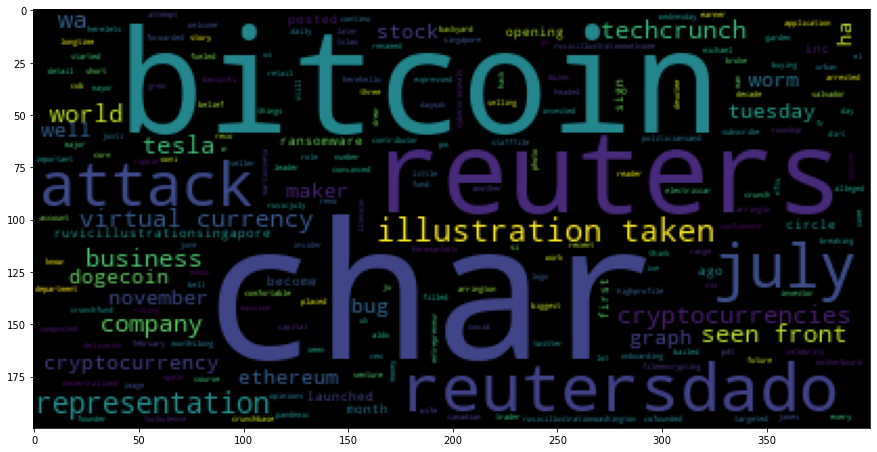

In [26]:
# Generate the Bitcoin word cloud
generate_cloud(btc_tokenized)

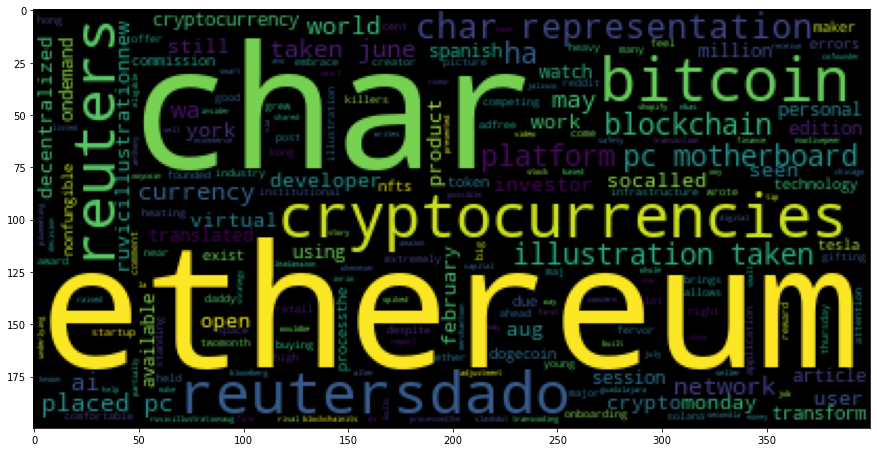

In [27]:
# Generate the Ethereum word cloud
generate_cloud(eth_tokenized)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df.content.str.cat()

In [32]:
# Run the NER processor on all of the text
btc_ner = nlp(concat_btc)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [33]:
# Render the visualization
displacy.render(btc_ner, style = "ent")

In [34]:
# List all Entities
for i in btc_ner.ents:
    print(i.text, i.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
chars]James Martin PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
Dado Ruvic/Illustration
Welcome ORG
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuters ORG
Tesla Inc ORG
2020 DATE
Kaseya PERSON
Russian NORP
hundreds CARDINAL
Concord Acquisition Cor

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
concat_eth = eth_df.content.str.cat()

In [36]:
# Run the NER processor on all of the text
eth_ner = nlp(concat_eth)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [37]:
# Render the visualization
displacy.render(eth_ner, style="ent")

In [38]:
# List all Entities
for i in eth_ner.ents:
    print(i.text, i.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum PERSON
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum ORG
Polygon ORG
$100 millio

---